In [1]:
from EqFabric import EqFabric
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import contextily as cx

# instantiate the EqFabric, automatically creating session
eq = EqFabric()

# read in csv to dataframe, filter to relevant subset
df = pd.read_csv("Wolf Pack Data.csv", low_memory = False)
subset = df[[
    "timestamp", 
    "location-lat", 
    "location-long", 
    "gps:dop", 
    "individual-local-identifier"
]]

# get the first n events associated with each unique wolf
n = 100
uniqueIds = subset["individual-local-identifier"].unique()
dfList: "list[pd.DataFrame]" = []
for id in uniqueIds:
    dfList.append(subset[subset["individual-local-identifier"] == id].head(n))
combined = pd.concat(dfList, ignore_index=True, sort=True)

# how many events?
print(combined.size)


21620


In [2]:
# compute meetings using eq's infer method
meetings = eq.infer(
    ids=combined["individual-local-identifier"], 
    times=combined["timestamp"],
    lats=combined["location-lat"], 
    longs=combined["location-long"], 
    error=combined["gps:dop"],
    timeInterval=0.5,
    spaceInterval=0.5,
)

# how many meetings?
print(meetings.size)

11487


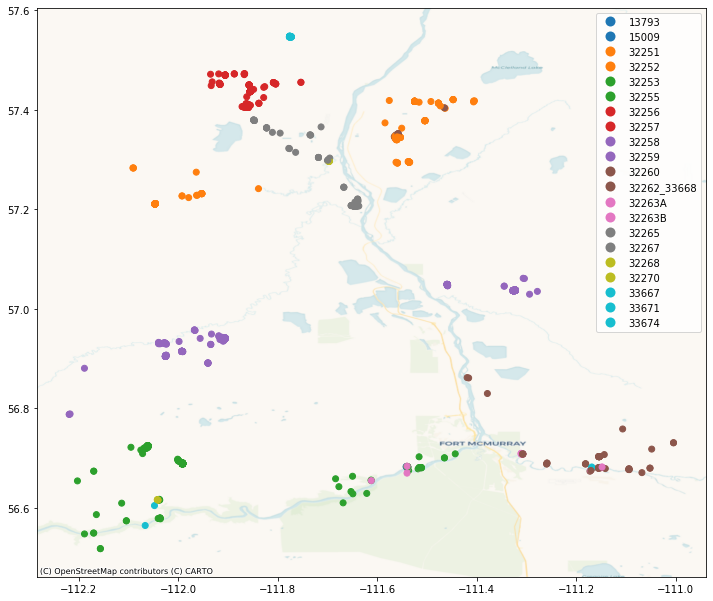

In [3]:
# create a map to plot the data
gdf = GeoDataFrame(meetings, geometry=gpd.points_from_xy(meetings["long"], meetings["lat"]))
gdf.set_crs(epsg=4326)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(column=gdf["wolf1Id"], legend=True, figsize=(12, 12))
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, crs='EPSG:4326')
plt.show()

In [4]:
# compute dead drops using eq's infer method (note coincident=False)
deadDrops = eq.infer(
    ids=combined["individual-local-identifier"], 
    times=combined["timestamp"],
    lats=combined["location-lat"], 
    longs=combined["location-long"], 
    error=combined["gps:dop"],
    timeInterval=0.5,
    spaceInterval=0.5,
    coincident=False
)

# how many dead drops?
print(deadDrops.size)

66906


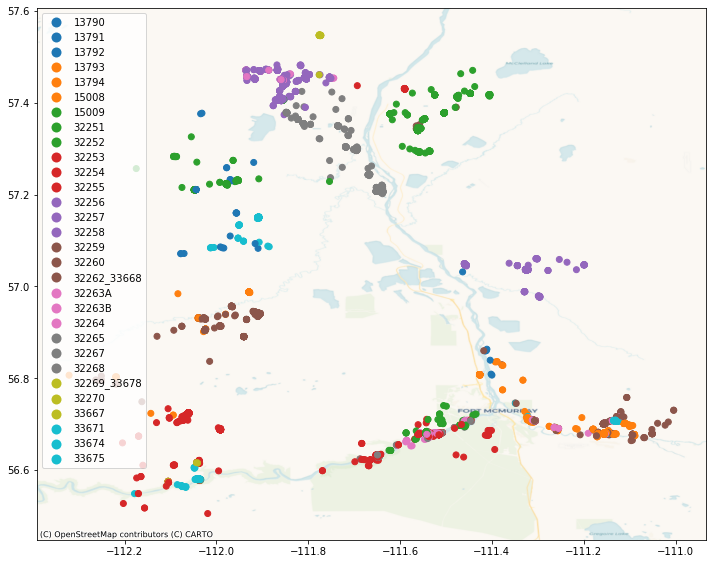

In [5]:
# create a map to plot the data
gdf = GeoDataFrame(deadDrops, geometry=gpd.points_from_xy(deadDrops["long"], deadDrops["lat"]))
gdf.set_crs(epsg=4326)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(column=gdf["wolf1Id"], legend=True, figsize=(12, 12))
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, crs='EPSG:4326')
plt.show()